In [25]:
import os

train_dir      = os.path.join('data', 'train')
validation_dir = os.path.join('data', 'validation')

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size=20

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 400x400
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode="categorical")

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode="categorical")

Found 18424 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


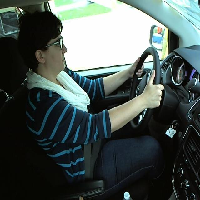

In [27]:
from tensorflow.keras.preprocessing import image
src = 'img_262.jpg'
image.load_img(src, target_size=(200, 200))

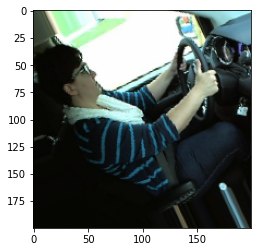

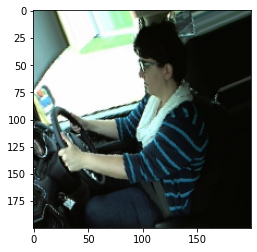

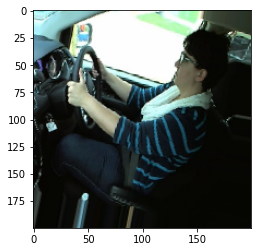

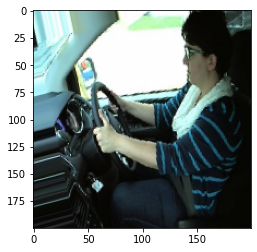

In [28]:
import numpy as np
import matplotlib.pyplot as plt 

# We pick one image to "augment"
img = image.load_img(src, target_size=(200, 200))

# Resize the image
img = np.reshape(img, (200, 200, 3))

# Convert it to a Numpy array
x = image.img_to_array(img)

# Reshape it to (1, 32, 32, 3)
x = x.reshape((1,) + x.shape)

i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    #conv_fm = model.predict(batch[0])
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    #save(X, y)
    i += 1
    if i % 4 == 0:#if i < 20000 == 0:
        break

plt.show()

In [29]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 32)      

In [30]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.Adam(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])

In [31]:
history = model.fit(
      train_generator,
      steps_per_epoch=18424//batch_size,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=4000//batch_size
      )

Epoch 1/20
921/921 [==============================] - 213s 231ms/step - loss: 2.2346 - accuracy: 0.1544 - val_loss: 1.7970 - val_accuracy: 0.3535
Epoch 2/20
921/921 [==============================] - 213s 232ms/step - loss: 1.7005 - accuracy: 0.3787 - val_loss: 1.2499 - val_accuracy: 0.5355
Epoch 3/20
921/921 [==============================] - 215s 233ms/step - loss: 1.3733 - accuracy: 0.5063 - val_loss: 0.9767 - val_accuracy: 0.6712
Epoch 4/20
921/921 [==============================] - 213s 231ms/step - loss: 1.1747 - accuracy: 0.5849 - val_loss: 0.8411 - val_accuracy: 0.7145
Epoch 5/20
921/921 [==============================] - 214s 232ms/step - loss: 1.0302 - accuracy: 0.6430 - val_loss: 0.7317 - val_accuracy: 0.7462
Epoch 6/20
921/921 [==============================] - 215s 233ms/step - loss: 0.9160 - accuracy: 0.6808 - val_loss: 0.6237 - val_accuracy: 0.7918
Epoch 7/20
921/921 [==============================] - 213s 232ms/step - loss: 0.8194 - accuracy: 0.7186 - val_loss: 0.6692 -

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

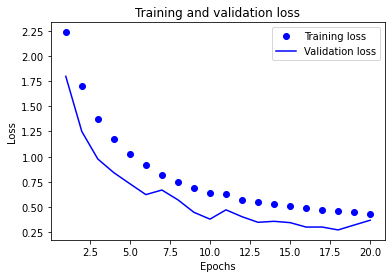

In [33]:
import matplotlib.pyplot as plt 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

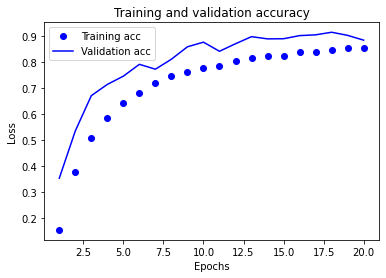

In [34]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [35]:
model.save('augModel.h5')